# Descriptions
- Prediksi yang dilakukan adalah klasifikasi untuk target churn (1-Yes atau 0-No) dan regresi untuk target tenure.
- Prediksi dengan klasifikasi menggunakan model machine learning decision tree classifier
- Prediksi dengan regresi menggunakan model machine learning decision regressor

# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Initialize and load dataset
Terdapat tiga dataset, antara lain:
- EDA dataset, yaitu dataset yang telah bersih dari outlier, missing, duplikat, dan mismatch. Siap untuk digunakan untuk eksplorasi.
- Feature engineering dataset, yaitu dataset hasil dari feature engineering yang meliputi, feature transformation, feature extraction, dan feture selection. Dataset terbagi lagi atas 2, yaitu untuk model classification dan model regression.
- PCA dataset adalah hasil reduki fitur menggunakan metode PCA (Principal Component Analysis).

## EDA

In [2]:
EDA_train_df = pd.read_csv('../datasets/train/EDA_train.csv')
EDA_test_df = pd.read_csv('../datasets/test/EDA_test.csv')

### Classification - Split dataset to X_train and y_train / X_test and y_test

In [3]:
X_EDA_classification_train = EDA_train_df.iloc[:, 1:20]
y_EDA_classification_train = EDA_train_df.iloc[:, 20:21]
X_EDA_classification_test  = EDA_test_df.iloc[:, 1:20]
y_EDA_classification_test  = EDA_test_df.iloc[:, 20:21]

### Regression - Split dataset to X_train and y_train / X_test and y_test

In [4]:
X_EDA_regression_train = EDA_train_df.loc[:, ['gender', 'senior_citizen', 'partner', 'dependents',
                                              'phone_service', 'multiple_lines', 'internet_service',
                                              'online_security', 'online_backup', 'device_protection', 'tech_support',
                                              'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
                                              'payment_method', 'monthly_charges', 'total_charges', 'churn']]

y_EDA_regression_train = EDA_train_df.loc[:, 'tenure']

X_EDA_regression_test  = EDA_test_df.loc[:, ['gender', 'senior_citizen', 'partner', 'dependents',
                                             'phone_service', 'multiple_lines', 'internet_service',
                                             'online_security', 'online_backup', 'device_protection', 'tech_support',
                                             'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
                                             'payment_method', 'monthly_charges', 'total_charges', 'churn']]

y_EDA_regression_test  = EDA_test_df.loc[:, 'tenure']

## Feature Engineering

### Classification Model

In [5]:
feature_engineering_classification_train_df = pd.read_csv('../datasets/train/feature_engineering_classification_train.csv')
feature_engineering_classification_test_df = pd.read_csv('../datasets/test/feature_engineering_classification_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test 

In [6]:
X_feature_engineering_classification_train = feature_engineering_classification_train_df.iloc[:, 0:4]
y_feature_engineering_classification_train = feature_engineering_classification_train_df.iloc[:, 4:5]
X_feature_engineering_classification_test  = feature_engineering_classification_test_df.iloc[:, 0:4]
y_feature_engineering_classification_test  = feature_engineering_classification_test_df.iloc[:, 4:5]

### Regression Model

In [7]:
feature_engineering_regression_train_df = pd.read_csv('../datasets/train/feature_engineering_regression_train.csv')
feature_engineering_regression_test_df = pd.read_csv('../datasets/test/feature_engineering_regression_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [8]:
X_feature_engineering_regression_train = feature_engineering_regression_train_df.iloc[:, 0:4]
y_feature_engineering_regression_train = feature_engineering_regression_train_df.iloc[:, 4:5]
X_feature_engineering_regression_test  = feature_engineering_regression_test_df.iloc[:, 0:4]
y_feature_engineering_regression_test  = feature_engineering_regression_test_df.iloc[:, 4:5]

## PCA

### Classification Model

In [9]:
PCA_classification_train_df = pd.read_csv('../datasets/train/PCA_classification_train.csv')
PCA_classification_test_df = pd.read_csv('../datasets/test/PCA_classification_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [10]:
X_PCA_classification_train = PCA_classification_train_df.iloc[:, 0:1]
y_PCA_classification_train = PCA_classification_train_df.iloc[:, 19:20]
X_PCA_classification_test  = PCA_classification_test_df.iloc[:, 0:1]
y_PCA_classification_test  = PCA_classification_test_df.iloc[:, 19:20]

### Regression Model

In [11]:
PCA_regression_train_df = pd.read_csv('../datasets/train/PCA_regression_train.csv')
PCA_regression_test_df  = pd.read_csv('../datasets/test/PCA_regression_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [12]:
X_PCA_regression_train = PCA_regression_train_df.iloc[:, 0:2]
y_PCA_regression_train = PCA_regression_train_df.iloc[:, 19:20]
X_PCA_regression_test  = PCA_regression_test_df.iloc[:, 0:2]
y_PCA_regression_test  = PCA_regression_test_df.iloc[:, 19:20]

# Build model

## Decision Tree
- Semua model menggunakan hyperparameter max_dept = 20 dan criterion = entropy, sesuai dengan referensi dari jurnal yang digunakan (Customer churn prediction in telecom using machine learning in big data platform - Abdelrahim Kasem Ahmad and Assef Jafar and Kadan Aljoumaa).

### EDA Dataset

#### Classification

In [13]:
clf = DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=42)
clf.fit(X_EDA_classification_train, y_EDA_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

In [14]:
accuracy_scores = []

for i in range(1, 22):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)
    
    clf.fit(X_EDA_classification_train, y_EDA_classification_train)
    accuracy_score_n = accuracy_score(y_EDA_classification_test, clf.predict(X_EDA_classification_test))
    accuracy_scores.append(accuracy_score_n)

In [15]:
for i in range(1, 21):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.766501%
max_depth 2 : 0.789212%
max_depth 3 : 0.792761%
max_depth 4 : 0.792051%
max_depth 5 : 0.794890%
max_depth 6 : 0.789212%
max_depth 7 : 0.781405%
max_depth 8 : 0.784244%
max_depth 9 : 0.777857%
max_depth 10 : 0.775727%
max_depth 11 : 0.765791%
max_depth 12 : 0.764372%
max_depth 13 : 0.758694%
max_depth 14 : 0.744500%
max_depth 15 : 0.745919%
max_depth 16 : 0.743790%
max_depth 17 : 0.750177%
max_depth 18 : 0.754436%
max_depth 19 : 0.740241%
max_depth 20 : 0.743080%


###### Cross Validation Score

In [16]:
cross_val_score(clf, X_EDA_classification_test, y_EDA_classification_test, cv=10)

array([0.74468085, 0.77304965, 0.72340426, 0.72340426, 0.71631206,
       0.74468085, 0.74468085, 0.68085106, 0.74468085, 0.74285714])

##### Confusion Matrix

In [17]:
y_train_pred = cross_val_predict(clf, X_EDA_classification_train, np.ravel(y_EDA_classification_train), cv=3)

print(f'True positive  : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[1, 0]}')

True positive  : 762
True negative  : 3378
False positive : 760
False negative : 734


###### Precision

In [18]:
print(f'Precision: {round(precision_score(np.ravel(y_EDA_classification_train), y_train_pred) * 100, 2)}%')

Precision: 50.07%


##### Recall

In [19]:
print(f'Recall: {round(recall_score(np.ravel(y_EDA_classification_train), y_train_pred) * 100, 2)}%')

Recall: 50.94%


##### F1-Score

In [20]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_EDA_classification_train), y_train_pred) * 100, 2)}%')

F-1 Score: 50.5%


##### Classification Report

In [21]:
print(classification_report(y_EDA_classification_train, clf.predict(X_EDA_classification_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4138
           1       0.98      0.97      0.98      1496

    accuracy                           0.99      5634
   macro avg       0.99      0.98      0.98      5634
weighted avg       0.99      0.99      0.99      5634



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [22]:
y_scores = cross_val_predict(clf, X_EDA_classification_train, np.ravel(y_EDA_classification_train), cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_EDA_classification_train, y_scores)

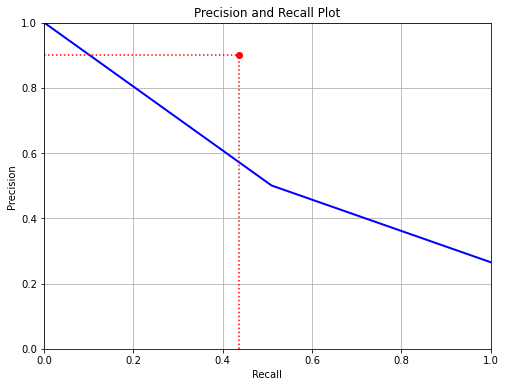

In [23]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### ROC and AUC Curve

In [24]:
fpr, tpr, thresholds = roc_curve(y_EDA_classification_train, y_scores)

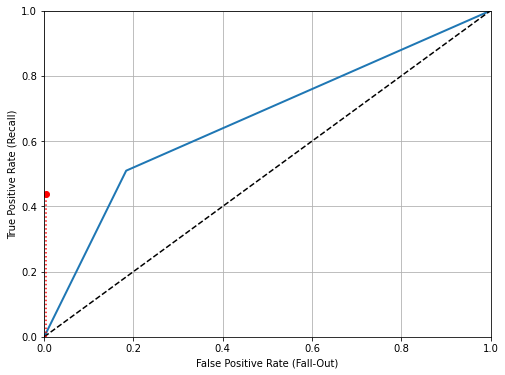

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [26]:
roc_auc_score(y_EDA_classification_train, y_scores)

0.6628473415817401

#### Regression

In [27]:
regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
cross_val_score(regressor, X_EDA_regression_train, y_EDA_regression_train, cv=3)

array([0.99736208, 0.99671765, 0.99535866])

##### R Squared Score

In [28]:
regressor.fit(X_EDA_regression_train, y_EDA_regression_train)
r2_score(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.9981332388386155

##### Explained Variance Score

In [29]:
explained_variance_score(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.9981350821550954

##### Mean Absolute Error

In [30]:
mean_absolute_error(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.5777146912704045

##### Mean Squared Error

In [31]:
mean_squared_error(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

1.1753016323633783

###### Predict with some feature

In [32]:
regressor.predict(X_EDA_regression_test.iloc[50:60, 0:19])

array([19., 23., 72., 72., 61., 67., 68.,  8.,  3., 17.])

In [33]:
y_EDA_regression_test[50:60]

50    19
51    23
52    72
53    72
54    59
55    70
56    70
57     9
58     3
59    17
Name: tenure, dtype: int64

### Feature Engineering Dataset

#### Classification

In [34]:
clf = DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=42)
clf.fit(X_feature_engineering_classification_train, y_feature_engineering_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

In [35]:
accuracy_scores = []

for i in range(1, 22):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(X_feature_engineering_classification_train, y_feature_engineering_classification_train)
    accuracy_score_n = accuracy_score(y_feature_engineering_classification_test, clf.predict(X_feature_engineering_classification_test))
    accuracy_scores.append(accuracy_score_n)

In [36]:
for i in range(1, 21):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.625976%
max_depth 2 : 0.628815%
max_depth 3 : 0.628815%
max_depth 4 : 0.628815%
max_depth 5 : 0.628815%
max_depth 6 : 0.628815%
max_depth 7 : 0.628815%
max_depth 8 : 0.628815%
max_depth 9 : 0.628815%
max_depth 10 : 0.628815%
max_depth 11 : 0.628815%
max_depth 12 : 0.628815%
max_depth 13 : 0.628815%
max_depth 14 : 0.628815%
max_depth 15 : 0.628815%
max_depth 16 : 0.628815%
max_depth 17 : 0.628815%
max_depth 18 : 0.628815%
max_depth 19 : 0.628815%
max_depth 20 : 0.628815%


##### Cross Validation Score

In [37]:
cross_val_score(clf, X_feature_engineering_classification_train, y_feature_engineering_classification_train, cv=10)

array([0.62765957, 0.65780142, 0.64716312, 0.61524823, 0.63232682,
       0.6749556 , 0.64120782, 0.63410302, 0.6625222 , 0.68561279])

##### Confusion Matrix

In [38]:
y_train_pred = cross_val_predict(clf, X_feature_engineering_classification_train, np.ravel(y_feature_engineering_classification_train), cv=3)

print(f'True positive  : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[1, 0]}')

True positive  : 1621
True negative  : 2036
False positive : 913
False negative : 1064


##### Precision

In [39]:
print(f'Precision: {round(precision_score(np.ravel(y_feature_engineering_classification_train), y_train_pred) * 100, 2)}%')

Precision: 63.97%


##### Recall

In [40]:
print(f'Recall: {round(recall_score(np.ravel(y_feature_engineering_classification_train), y_train_pred) * 100, 2)}%')

Recall: 60.37%


##### F1-Score

In [41]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_feature_engineering_classification_train), y_train_pred) * 100, 2)}%')

F-1 Score: 62.12%


##### Classification Report

In [42]:
print(classification_report(y_feature_engineering_classification_train, clf.predict(X_feature_engineering_classification_train)))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      2949
           1       0.63      0.66      0.64      2685

    accuracy                           0.65      5634
   macro avg       0.65      0.65      0.65      5634
weighted avg       0.65      0.65      0.65      5634



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [43]:
y_scores = cross_val_predict(clf, X_feature_engineering_classification_train, np.ravel(y_feature_engineering_classification_train), cv=3,)
precisions, recalls, thresholds = precision_recall_curve(y_feature_engineering_classification_train, y_scores)

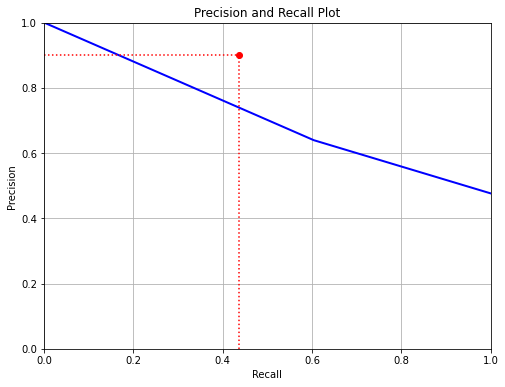

In [44]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### ROC and AUC Curve

In [45]:
fpr, tpr, thresholds = roc_curve(y_feature_engineering_classification_train, y_scores)

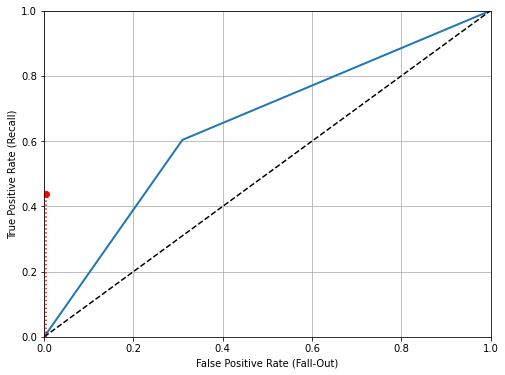

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [47]:
roc_auc_score(y_feature_engineering_classification_train, y_scores)

0.6470639607025201

#### Regression

In [48]:
regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
cross_val_score(regressor, X_feature_engineering_regression_train, y_feature_engineering_regression_train, cv=10)

array([0.99860715, 0.99848824, 0.9983613 , 0.99760376, 0.99831757,
       0.99715371, 0.99750505, 0.99732478, 0.99576601, 0.99833165])

##### R Squared Error

In [49]:
regressor.fit(X_feature_engineering_regression_train, y_feature_engineering_regression_train)
r2_score(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

0.9986562926905976

##### Mean Absolute Error

In [50]:
mean_absolute_error(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

0.47977288857345635

##### Mean Squared Error

In [51]:
mean_squared_error(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

0.8459900638750887

##### Predict with some feature

In [52]:
regressor.predict(X_feature_engineering_regression_test.iloc[50:60, 0:19])

array([19., 23., 72., 72., 60., 68., 68.,  8.,  3., 17.])

In [53]:
y_feature_engineering_regression_test[50:60]

,tenure
50,19
51,23
52,72
53,72
54,59
55,70
56,70
57,9
58,3
59,17


### PCA Dataset

#### Classification

In [54]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)
clf.fit(X_PCA_classification_train, y_PCA_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [55]:
accuracy_scores = []

for i in range(1, 22):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(X_PCA_classification_train, y_PCA_classification_train)
    accuracy_score_n = accuracy_score(y_PCA_classification_test, clf.predict(X_PCA_classification_test))
    
    accuracy_scores.append(accuracy_score_n)

In [56]:
for i in range(1, 21):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.742370%
max_depth 2 : 0.757275%
max_depth 3 : 0.756565%
max_depth 4 : 0.753016%
max_depth 5 : 0.753016%
max_depth 6 : 0.748048%
max_depth 7 : 0.749468%
max_depth 8 : 0.748048%
max_depth 9 : 0.746629%
max_depth 10 : 0.738822%
max_depth 11 : 0.740951%
max_depth 12 : 0.741661%
max_depth 13 : 0.733144%
max_depth 14 : 0.740241%
max_depth 15 : 0.740241%
max_depth 16 : 0.738112%
max_depth 17 : 0.736693%
max_depth 18 : 0.738112%
max_depth 19 : 0.735983%
max_depth 20 : 0.733854%


##### Cross Validation Score

In [57]:
cross_val_score(clf, X_PCA_classification_test, y_PCA_classification_test, cv=3)

array([0.70638298, 0.6787234 , 0.69509595])

##### Precision

In [58]:
y_train_pred = cross_val_predict(clf, X_PCA_classification_train, np.ravel(y_PCA_classification_train), cv=3)

print(f'Precision: {round(precision_score(np.ravel(y_PCA_classification_train), y_train_pred) * 100, 2)}%')

Precision: 41.38%


##### Recall

In [59]:
print(f'Recall: {round(recall_score(np.ravel(y_PCA_classification_train), y_train_pred) * 100, 2)}%')

Recall: 23.73%


##### F1-Score

In [60]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_PCA_classification_train), y_train_pred) * 100, 2)}%')

F-1 Score: 30.16%


##### Classification Report

In [61]:
print(classification_report(y_PCA_classification_train, clf.predict(X_PCA_classification_train)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4138
           1       0.94      0.49      0.64      1496

    accuracy                           0.86      5634
   macro avg       0.89      0.74      0.78      5634
weighted avg       0.87      0.86      0.84      5634



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [62]:
y_scores = cross_val_predict(clf, X_PCA_classification_train, np.ravel(y_PCA_classification_train), cv=3,)
precisions, recalls, thresholds = precision_recall_curve(y_PCA_classification_train, y_scores)

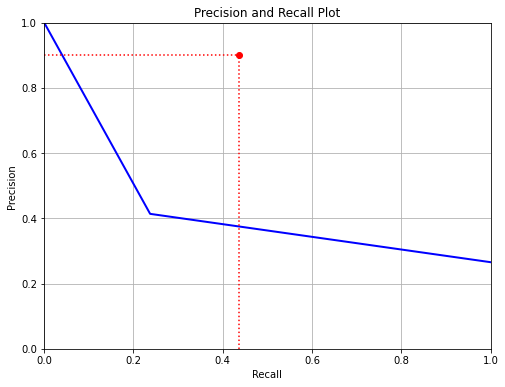

In [63]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [64]:
fpr, tpr, thresholds = roc_curve(y_PCA_classification_train, y_scores)

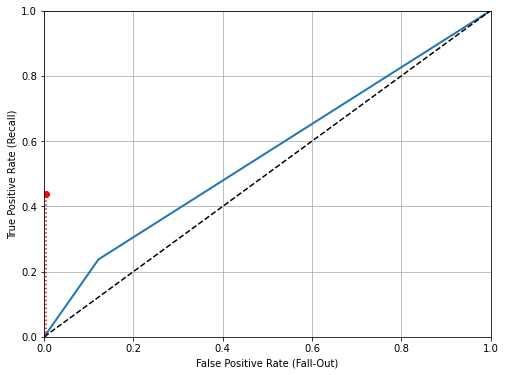

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [66]:
roc_auc_score(y_PCA_classification_train, y_scores)

0.5578715789228824

#### Regression

In [67]:
regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
cross_val_score(regressor, X_PCA_regression_test, y_PCA_regression_test, cv=10)

array([0.99730084, 0.99699891, 0.99541192, 0.99802213, 0.99766373,
       0.99409278, 0.9976941 , 0.99662098, 0.99820557, 0.99603575])

##### R Squared Error

In [68]:
regressor.fit(X_PCA_regression_train, y_PCA_regression_train)
r2_score(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

0.9994126916877528

##### Mean Absolute Error

In [69]:
mean_absolute_error(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

0.2817601135557133

##### Mean Squared Error

In [70]:
mean_squared_error(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

0.3697657913413769

##### Predict with some feature

In [71]:
regressor.predict(X_PCA_regression_test.iloc[50:60, 0:19])

array([19., 24., 72., 72., 60., 70., 69.,  9.,  3., 16.])

In [72]:
y_PCA_regression_test[50:60]

,tenure
50,19
51,23
52,72
53,72
54,59
55,70
56,70
57,9
58,3
59,17


# Conclusion

- Untuk classification menggunakan classification dataset feature engineering. Alasan accuracy tinggi model yang sama dengan dataset berbeda dan fitur telah diseleksi.
- Untuk regression menggunakan regresi dengan dataset PCA. Alasannya akurasi tinggi dibanding dengan model yang sama dengan dataset berbeda dan dimensi feature hanya dua komponen.